### Homework 3

In [2]:
#Imports needed for code

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pandas as pd
import PIL
from PIL import Image, ImageDraw, ImageFilter

### Problem 1

In [7]:
# Part 1A
alg1_trueBird = 45
alg1_truePerson = 47
alg1_falseBird = 5
alg1_falsePerson = 3

alg2_trueBird = 47
alg2_truePerson = 42
alg2_falseBird = 11
alg2_falsePerson = 1

alg1_birdSuccess = (alg1_trueBird) / (alg1_trueBird + alg1_falsePerson)
alg1_personSuccess = (alg1_truePerson) / (alg1_truePerson + alg1_falseBird)
alg1_totalSuccess = (alg1_trueBird + alg1_truePerson) / (alg1_trueBird + alg1_truePerson + alg1_falseBird + alg1_falsePerson)
alg2_birdSuccess = (alg2_trueBird) / (alg2_trueBird + alg2_falsePerson)
alg2_personSuccess = (alg2_truePerson) / (alg2_truePerson + alg2_falseBird)
alg2_totalSuccess = (alg2_trueBird + alg2_truePerson) / (alg2_trueBird + alg2_truePerson + alg2_falseBird + alg2_falsePerson)

print("Neural Network true total success:", alg1_totalSuccess)
print("New Algorithm true total success:", alg2_totalSuccess)

Neural Network true total success: 0.92
New Algorithm true total success: 0.8811881188118812


### 1A: 
Above, the probabilities of successfully identifying birds/people in each algorithm is calculated. The Neural Network had a higher rate of success     (92%) compared to the New Algorithm, which had a success rate of only 88%.

In [8]:
#Part 1B
print("Neural Network true bird success:", alg1_birdSuccess)
print("Neural Network true person success:", alg1_personSuccess)
print("New Algorithm true bird success:", alg2_birdSuccess)
print("New Algorithm true person success:", alg2_personSuccess)

Neural Network true bird success: 0.9375
Neural Network true person success: 0.9038461538461539
New Algorithm true bird success: 0.9791666666666666
New Algorithm true person success: 0.7924528301886793


### 1B: 
Although the Neural Network has a higher total success of identifying birds and people, the New Algorithm is better at identifying just birds.         Therefore, the New Algorithm is better for the zoo.

In [11]:
# Part 1C
alg1_trueBird = alg1_birdSuccess * 99
alg1_truePerson = alg1_personSuccess * 1
alg1_falseBird = (1-alg1_birdSuccess) * 99
alg1_falsePerson = (1-alg1_personSuccess) * 1

alg2_trueBird = alg2_birdSuccess * 99
alg2_truePerson = alg2_personSuccess * 1
alg2_falseBird = (1-alg2_birdSuccess) * 99
alg2_falsePerson = (1-alg2_personSuccess) * 1

print("Neural Network Bird True Bird:", alg1_trueBird)
print("Neural Network Bird True Person:", alg1_falsePerson)
print("Neural Network Person True Bird:", alg1_falseBird)
print("Neural Network Person True Person:", alg1_truePerson)
print()
print("New Algorithm Bird True Bird:", alg2_trueBird)
print("New Algorithm Bird True Person:", alg2_falsePerson)
print("New Algorithm Person True Bird:", alg2_falseBird)
print("New Algorithm Person True Person:", alg2_truePerson)

Neural Network Bird True Bird: 92.8125
Neural Network Bird True Person: 0.09615384615384615
Neural Network Person True Bird: 6.1875
Neural Network Person True Person: 0.9038461538461539

New Algorithm Bird True Bird: 96.9375
New Algorithm Bird True Person: 0.2075471698113207
New Algorithm Person True Bird: 2.0625000000000036
New Algorithm Person True Person: 0.7924528301886793


### 1C
Above are the truth tables for the zoo, given that during the pandemic, only the zoo keeper visits the zoo. Just 1% of the visitors are people, and 99% are birds. Because we have already calculated the success rate for people and birds in both algorithms, you can multiply each probability by the expected value of the amount of birds/humans (99% and 1%) to get the new values. False positives are calculated by doing 1 - (probability of true positives).

### Problem 2

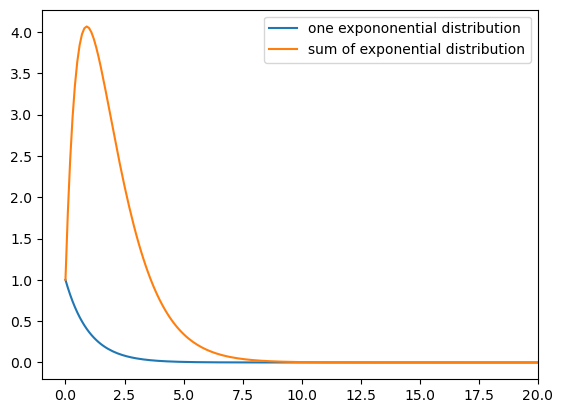

In [14]:
# Part 2A
x = np.linspace(0,100,1001)
xc = np.linspace(0,200,2001)
ex1 = stats.expon.pdf(x)
ex2 = stats.expon.pdf(x)
both = np.convolve(ex1, ex2)
fig, ax = plt.subplots(1)
ax.plot(x,ex1, label='one expononential distribution')
ax.plot(xc, both, label='sum of exponential distribution')
ax.set_xlim([-1, 20])
plt.legend(loc='best')
plt.show()

### 2A
The pdf of the sum of two identical exponential distributions vs the pdf of a single exponential distribution is graphed above. The sum of two identical exponential distributions is the Erlang distribution with shape of k = 2 and rate of $\lambda$.

The exponential distribution $f(x) = \lambda e^{-\lambda x}$; convolving the two of them together we get:  $f_2(x) = \int_{z} f(z)\cdot f(x-z) \,dz = \lambda^2xe^{-\lambda x}$

### 2B

The pdf of the ratio of two zero-mean unity variance normal distribution $X_1/X_2$ is a Cauchy distribution

The pdfs of the Gaussian distributions are: $f_{X_1}(x_1) = \frac{1}{2\pi} e^{-\frac{x_1^2}{2}}$ and $f_{X_2}(x_2) = \frac{1}{2\pi} e^{-\frac{x_2^2}{2}}$

The joint probability density function is: $f_{X_1, X_2}(x_1, x_2) = \frac{1}{2\pi} e^{-\frac{x_1^2}{2}} e^{-\frac{x_2^2}{2}}$

The Cauchy distribution is defined as $Z = X_1/X_2$, 

so we get $f_{Z}(x) = \frac{1}{2\pi} \int_{z} \lvert z \rvert e^{-\frac{(xz)^2}{2}} e^{-\frac{(z)^2}{2}} = \frac{1}{\pi (x^2 + 1)}$

### 2C
The amplitude of a 2D gaussian vector is $\lvert Z \rvert = \sqrt{X^2+Y^2}$

The pdf of a 2D gaussian is $f(z) = \frac{1}{\lvert \sqrt{2 \pi \Sigma} \rvert} e^{-\frac{1}{2} (z-\mu)^T\Sigma^{-1}(z-\mu)}$, where $z = (x, y)$, $\mu = (\mu_x, \mu_y)$